In [1]:
import pandas as pd
import os

file_path = os.path.join('data', 'processed', 'TMR_COMPILADO.csv')
df = pd.read_csv(file_path, encoding='latin1', sep=';')  # por si viene separado por punto y coma

# Definir columnas numéricas y no numéricas
numeric_cols_noTLASmax = ['LASmax', 'SEL', 'Leq', 'LAZ', 'EPNL', 'Temperature [øC]']
non_numeric_cols = ['NMT', 'A/D', 'Runway', 'Flight', 'Airline', 'Airline (Name)', 'From/To', 'Callsign', 'Aircraft Type']

# Convertir columnas numéricas (reemplazando comas por puntos y convirtiendo a float)
for col in numeric_cols_noTLASmax:
    df[col] = df[col].str.replace(',', '.').astype(float)

# Verificar tipos de datos
print(df.dtypes)

# Separar datos numéricos y no numéricos
numeric_data = df[numeric_cols_noTLASmax]
non_numeric_data = df[non_numeric_cols]


NMT                  object
TLASmax              object
LASmax              float64
SEL                 float64
Leq                 float64
LAZ                 float64
EPNL                float64
Temperature [øC]    float64
A/D                  object
Runway               object
Flight               object
Airline              object
Airline (Name)       object
From/To              object
Callsign             object
Aircraft Type        object
dtype: object


In [2]:
# Mostrar información general del DataFrame
print(df.info())

# Resumen estadístico de variables numéricas
print(df.describe())

# Contar valores únicos por columna
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284309 entries, 0 to 284308
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   NMT               284309 non-null  object 
 1   TLASmax           284309 non-null  object 
 2   LASmax            284309 non-null  float64
 3   SEL               284309 non-null  float64
 4   Leq               284309 non-null  float64
 5   LAZ               284309 non-null  float64
 6   EPNL              281264 non-null  float64
 7   Temperature [øC]  283709 non-null  float64
 8   A/D               155022 non-null  object 
 9   Runway            154221 non-null  object 
 10  Flight            155022 non-null  object 
 11  Airline           155022 non-null  object 
 12  Airline (Name)    128363 non-null  object 
 13  From/To           155022 non-null  object 
 14  Callsign          155022 non-null  object 
 15  Aircraft Type     155022 non-null  object 
dtypes: float64(6), objec

In [3]:
#borramos esta columna porque nos estregaba un dato repetido y ademas habia falta de datos.
df = df.drop('Airline (Name)', axis=1)

In [4]:
# Identificar valores nulos
print(df.isnull().sum())

NMT                      0
TLASmax                  0
LASmax                   0
SEL                      0
Leq                      0
LAZ                      0
EPNL                  3045
Temperature [øC]       600
A/D                 129287
Runway              130088
Flight              129287
Airline             129287
From/To             129287
Callsign            129287
Aircraft Type       129287
dtype: int64


In [5]:
df = df.dropna()
# Identificar valores nulos
print(df.isnull().sum())

NMT                 0
TLASmax             0
LASmax              0
SEL                 0
Leq                 0
LAZ                 0
EPNL                0
Temperature [øC]    0
A/D                 0
Runway              0
Flight              0
Airline             0
From/To             0
Callsign            0
Aircraft Type       0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152682 entries, 0 to 284308
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   NMT               152682 non-null  object 
 1   TLASmax           152682 non-null  object 
 2   LASmax            152682 non-null  float64
 3   SEL               152682 non-null  float64
 4   Leq               152682 non-null  float64
 5   LAZ               152682 non-null  float64
 6   EPNL              152682 non-null  float64
 7   Temperature [øC]  152682 non-null  float64
 8   A/D               152682 non-null  object 
 9   Runway            152682 non-null  object 
 10  Flight            152682 non-null  object 
 11  Airline           152682 non-null  object 
 12  From/To           152682 non-null  object 
 13  Callsign          152682 non-null  object 
 14  Aircraft Type     152682 non-null  object 
dtypes: float64(6), object(9)
memory usage: 18.6+ MB


In [8]:
numeric_cols_noTLASmax = ['LASmax', 'SEL', 'Leq', 'LAZ', 'EPNL', 'Temperature [øC]']
non_numeric_cols = ['NMT', 'A/D', 'Runway', 'Flight', 'Airline', 'From/To', 'Callsign', 'Aircraft Type']
df[numeric_cols_noTLASmax].describe()

,LASmax,SEL,Leq,LAZ,EPNL,Temperature [øC]
count,152682.000000,152682.000000,152682.000000,152682.000000,152682.000000,152682.000000
mean,73.610426,82.822563,69.116234,73.097598,84.403600,16.225272
std,5.859322,5.720394,4.809504,5.303480,5.825353,7.550042
min,49.400000,56.400000,47.100000,47.300000,57.900000,-3.000000
25%,68.700000,78.300000,65.000000,69.000000,79.900000,10.600000
50%,73.700000,83.100000,69.200000,73.300000,84.600000,15.100000
75%,78.300000,87.500000,72.900000,77.400000,89.100000,21.500000
max,117.500000,129.300000,112.300000,120.500000,127.800000,37.400000


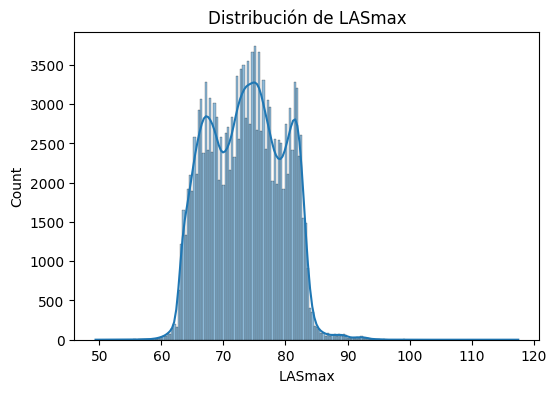

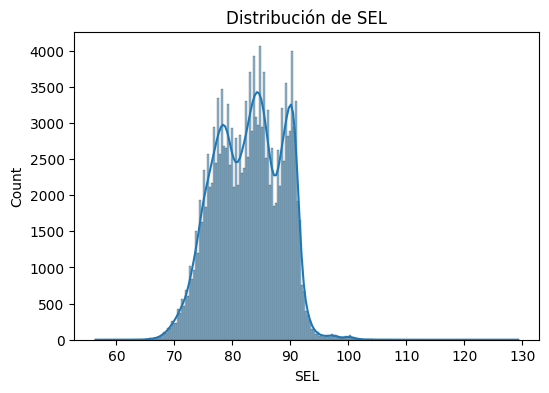

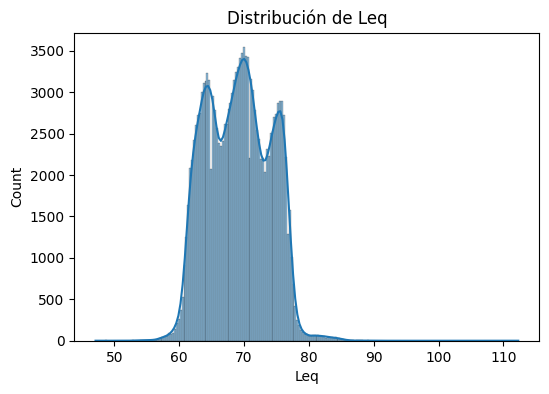

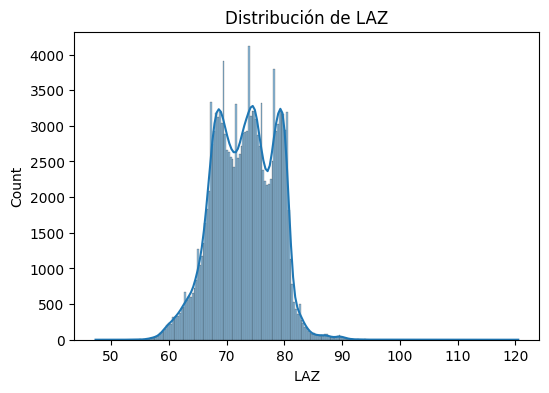

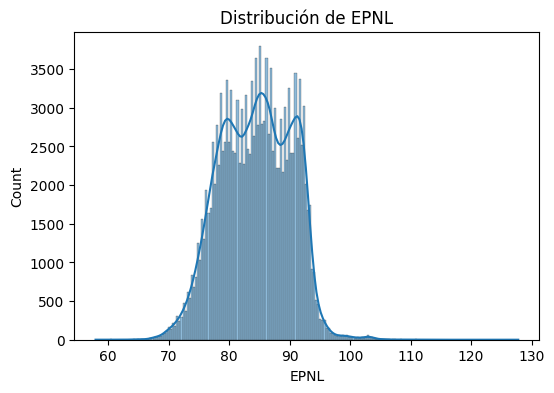

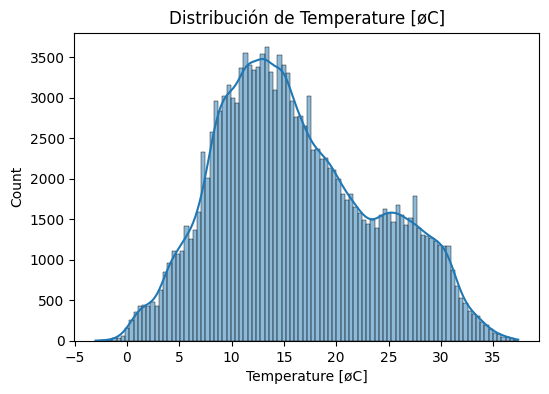

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols_noTLASmax:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

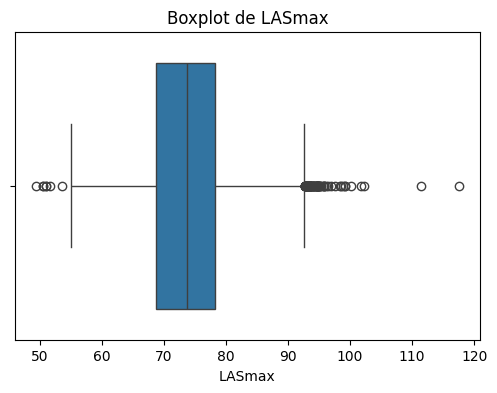

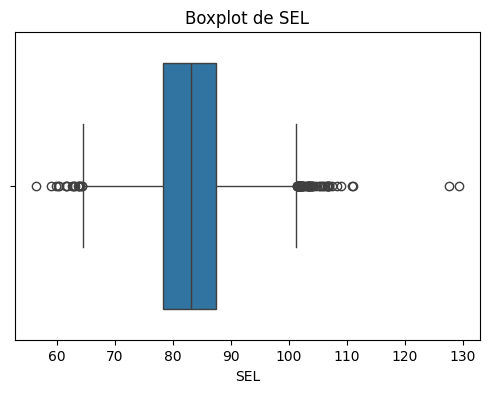

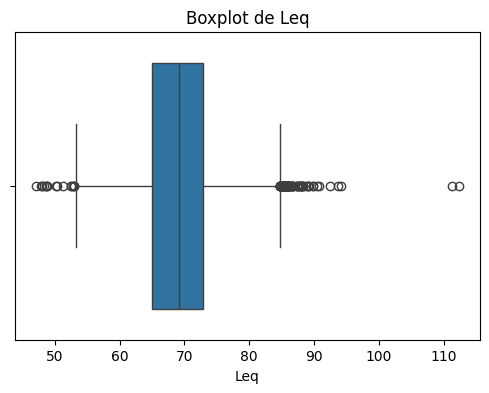

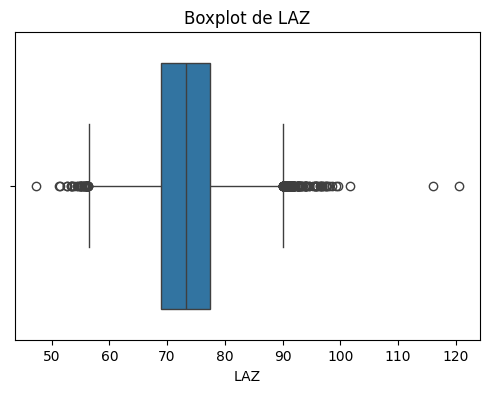

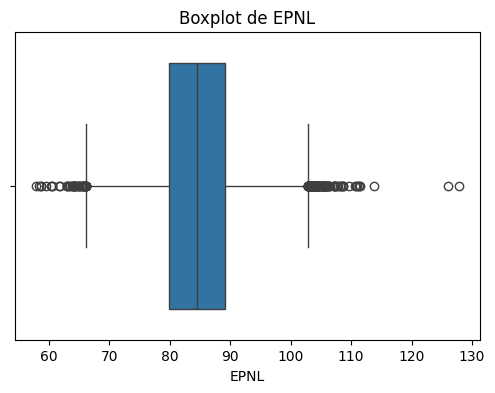

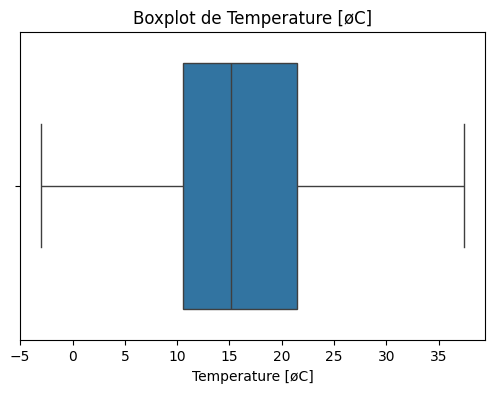

In [10]:
for col in numeric_cols_noTLASmax:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

In [16]:
col = 'LASmax'

Q1 = df[col].quantile(0.25)
Q2 = df[col].quantile(0.50)  # Mediana
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_whisker = df[col][df[col] >= Q1 - 1.5 * IQR].min()
upper_whisker = df[col][df[col] <= Q3 + 1.5 * IQR].max()

print(f"Análisis de boxplot para '{col}':")
print(f"Q1 (25%): {Q1:.2f}")
print(f"Q2 (Mediana): {Q2:.2f}")
print(f"Q3 (75%): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Bigote inferior (mínimo sin ser outlier): {lower_whisker:.2f}")
print(f"Bigote superior (máximo sin ser outlier): {upper_whisker:.2f}")

Análisis de boxplot para 'LASmax':
Q1 (25%): 68.70
Q2 (Mediana): 73.70
Q3 (75%): 78.30
IQR: 9.60
Bigote inferior (mínimo sin ser outlier): 55.10
Bigote superior (máximo sin ser outlier): 92.60


In [20]:
outlayers_LASmax = df['LASmax'] > 92.60 
outlayers_LASmax.sum()
#df[outlayers_LASmax]
#porcentaje = outlayers_LASmax.mean() * 100
#print(f"{porcentaje:.2f}% de las filas tienen LASmax > 95")

np.int64(107)

In [22]:
outliers_LASmax = df['LASmax'] > 92.6
sensores_outliers = df.loc[outliers_LASmax, df.columns[0]]  # Primera columna es el sensor
print(sensores_outliers.value_counts())

NMT
MP02    84
MP01    22
MP03     1
Name: count, dtype: int64


In [24]:
non_numeric_cols = ['NMT', 'A/D', 'Runway', 'Flight', 'Airline', 'From/To', 'Callsign', 'Aircraft Type']
for col in non_numeric_cols:
    print(f'\nFrecuencias de {col}:\n')
    print(df[col].value_counts())


Frecuencias de NMT:

NMT
MP02    61035
MP03    52612
MP01    39035
Name: count, dtype: int64

Frecuencias de A/D:

A/D
Departure    138024
Arrival       14658
Name: count, dtype: int64

Frecuencias de Runway:

Runway
17L    117622
17R     32573
35R      2355
35L       132
Name: count, dtype: int64

Frecuencias de Flight:

Flight
LAN801     707
AAL912     664
CCACV      662
LNE1446    654
DAL146     650
          ... 
LAN1107      1
LAN93        1
SKU2622      1
ABD4811      1
MOLOT        1
Name: count, Length: 3106, dtype: int64

Frecuencias de Airline:

Airline
LAN    60360
SKU    20318
LXP    16603
JAT    12428
TAM     4519
       ...  
PSR        1
N75        1
KPO        1
N62        1
FWK        1
Name: count, Length: 413, dtype: int64

Frecuencias de From/To:

From/To
SCCF    10763
SCFA     9968
SCTE     9759
SPJC     8603
SBGR     8292
        ...  
MHLM        1
SBSL        1
SCQY        1
SCPG        1
SCVV        1
Name: count, Length: 253, dtype: int64

Frecuencias de Call

C:\Users\claup\AppData\Local\Temp\ipykernel_5308\133486711.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=order, palette=palette)
C:\Users\claup\AppData\Local\Temp\ipykernel_5308\133486711.py:15: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  ax = sns.countplot(data=df, x=col, order=order, palette=palette)


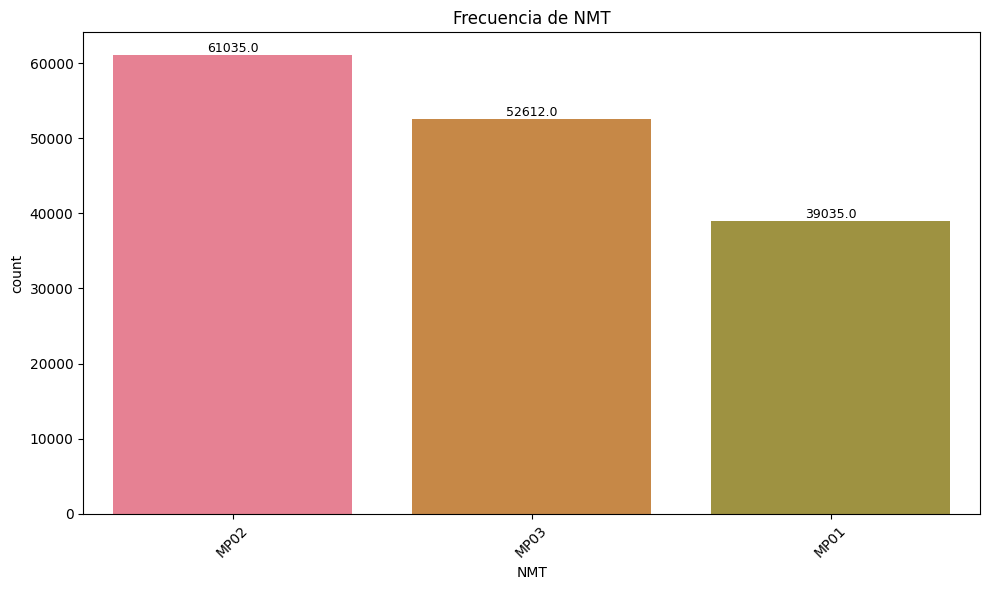

C:\Users\claup\AppData\Local\Temp\ipykernel_5308\133486711.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=order, palette=palette)
C:\Users\claup\AppData\Local\Temp\ipykernel_5308\133486711.py:15: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x=col, order=order, palette=palette)


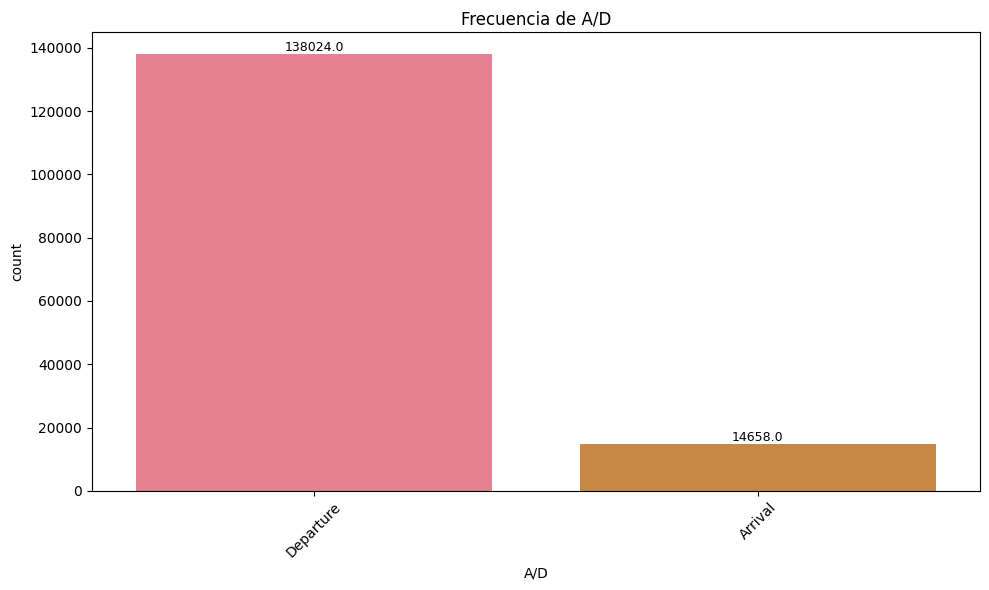

C:\Users\claup\AppData\Local\Temp\ipykernel_5308\133486711.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=order, palette=palette)
C:\Users\claup\AppData\Local\Temp\ipykernel_5308\133486711.py:15: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.countplot(data=df, x=col, order=order, palette=palette)


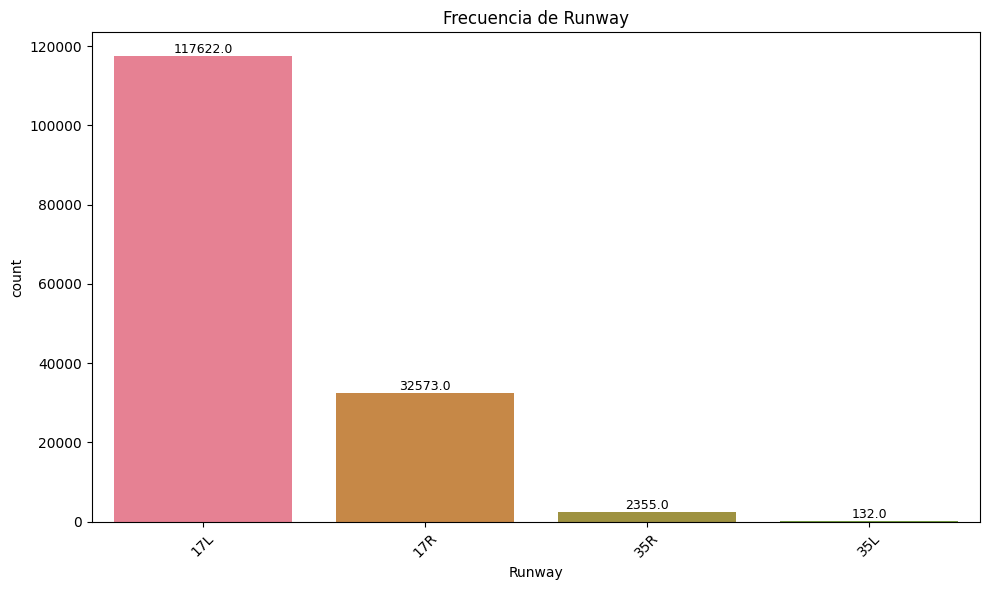

C:\Users\claup\AppData\Local\Temp\ipykernel_5308\133486711.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=order, palette=palette)


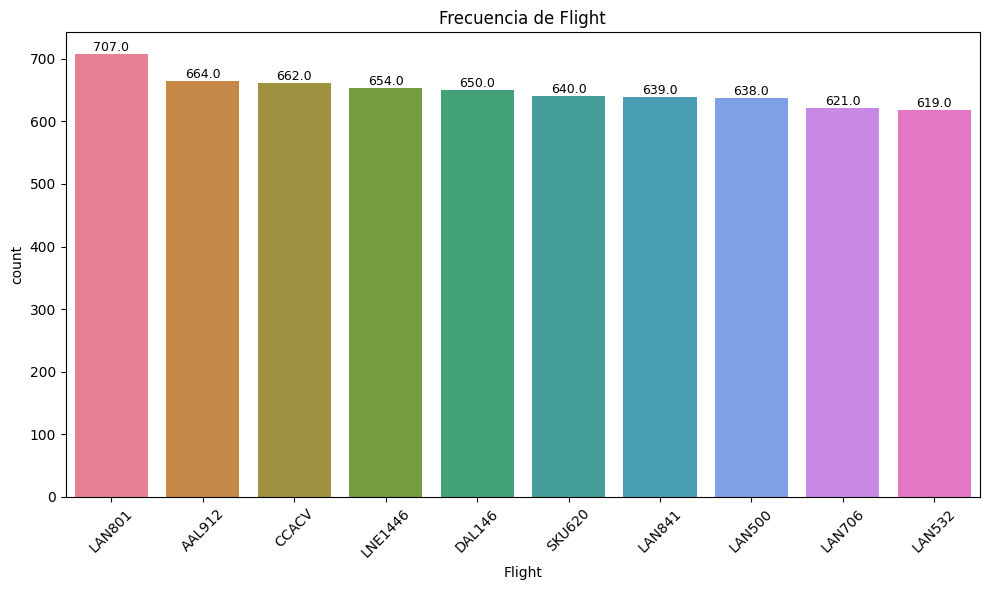

C:\Users\claup\AppData\Local\Temp\ipykernel_5308\133486711.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=order, palette=palette)


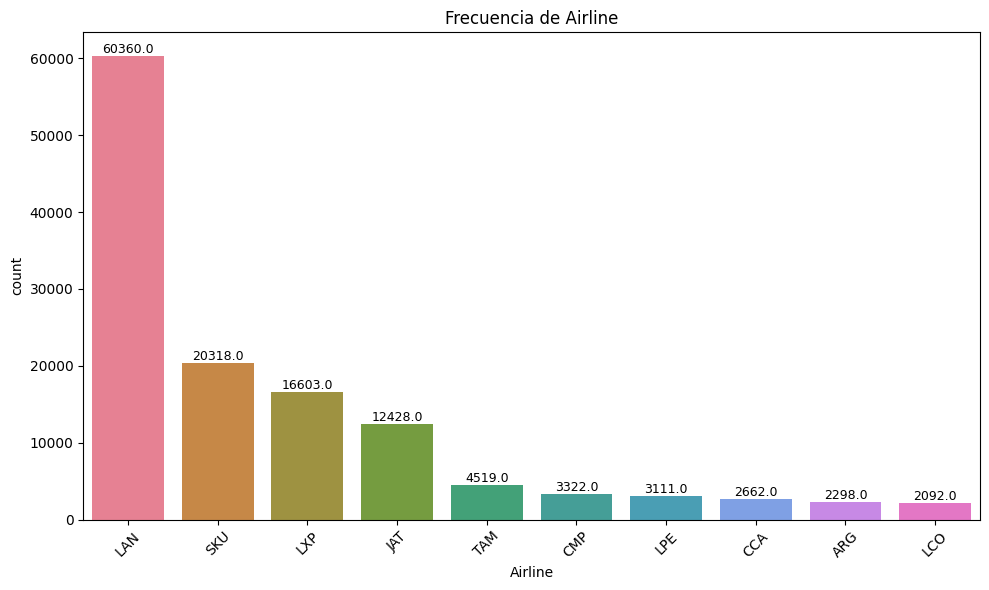

C:\Users\claup\AppData\Local\Temp\ipykernel_5308\133486711.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=order, palette=palette)


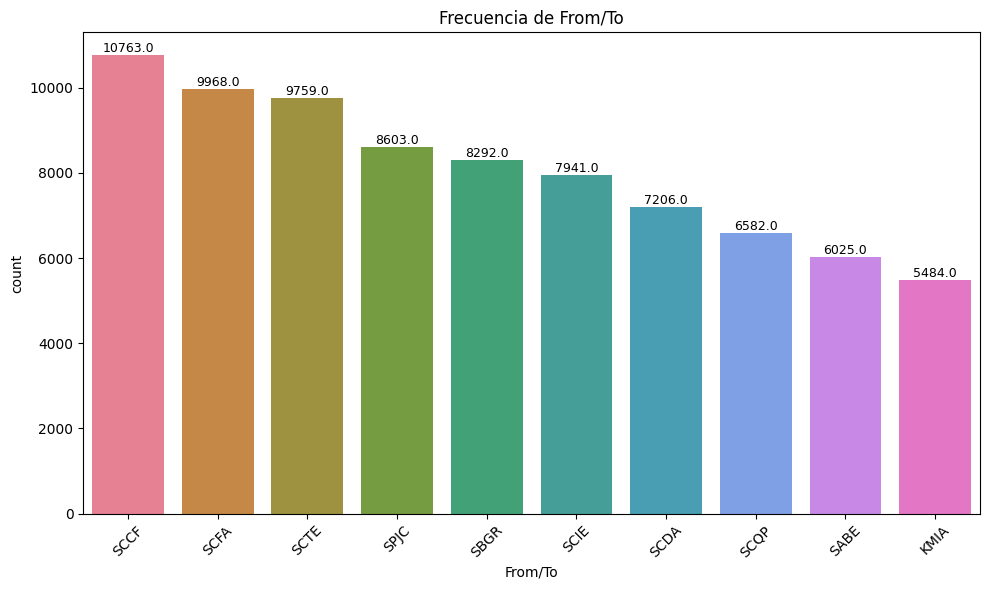

C:\Users\claup\AppData\Local\Temp\ipykernel_5308\133486711.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=order, palette=palette)


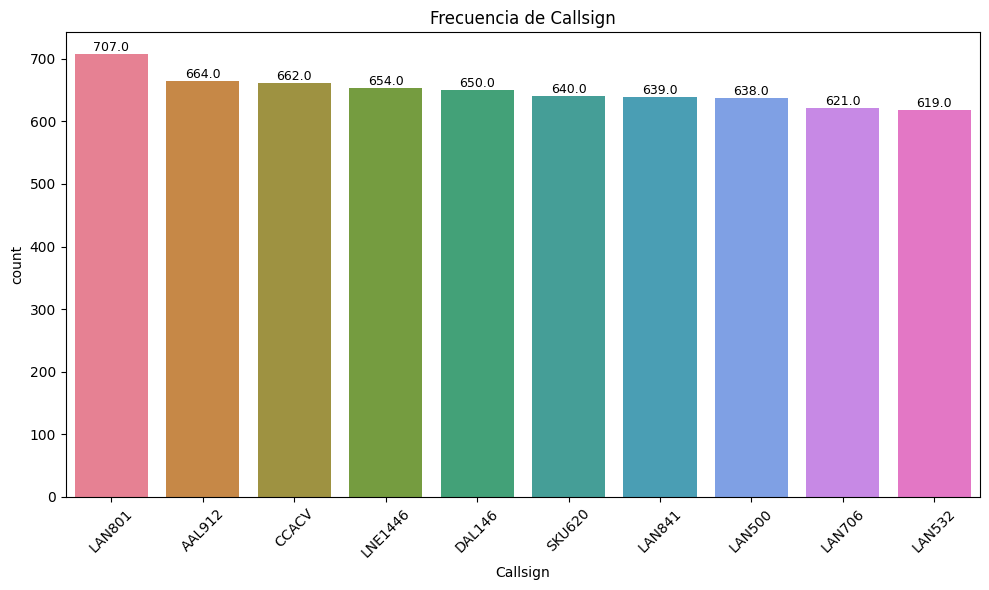

C:\Users\claup\AppData\Local\Temp\ipykernel_5308\133486711.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=order, palette=palette)


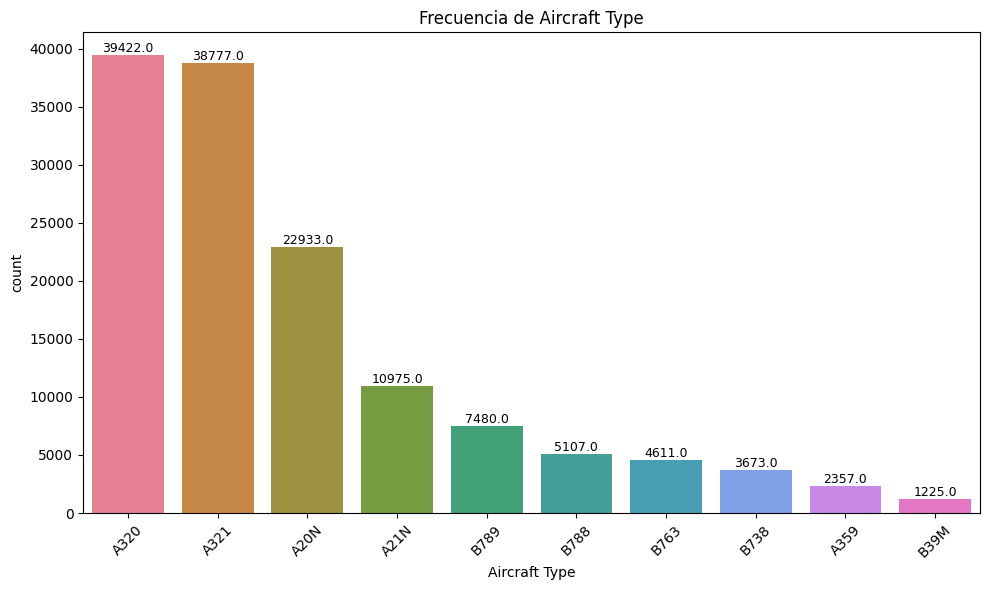

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Paleta de colores intercalados (puedes cambiarla a gusto)
palette = sns.color_palette("husl", 10)  # 10 colores distintos

for col in non_numeric_cols:
    plt.figure(figsize=(10, 6))

    # Top 10 categorías
    order = df[col].value_counts().index[:10]

    # Crear gráfico de barras
    ax = sns.countplot(data=df, x=col, order=order, palette=palette)

    # Títulos y formato
    plt.title(f'Frecuencia de {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Agregar etiquetas con los conteos
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=9)

    plt.show()

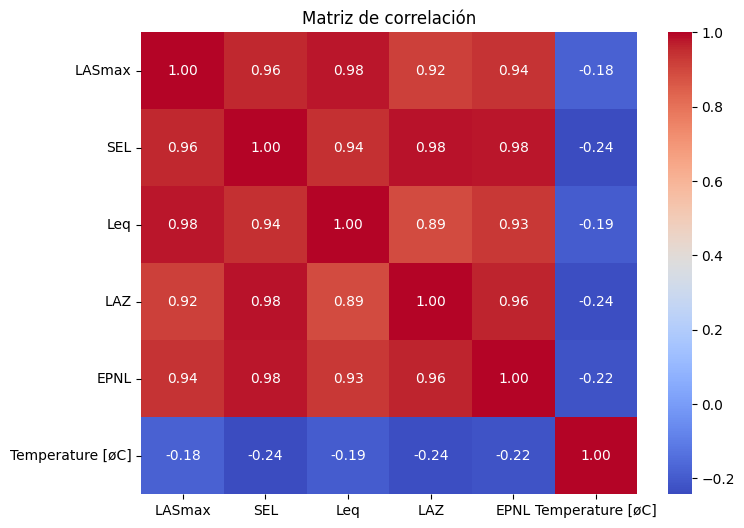

In [33]:
corr = df[numeric_cols_noTLASmax].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

C:\Users\claup\AppData\Local\Temp\ipykernel_5308\1127347233.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=range_counts.index, y=range_counts.values, palette='viridis')


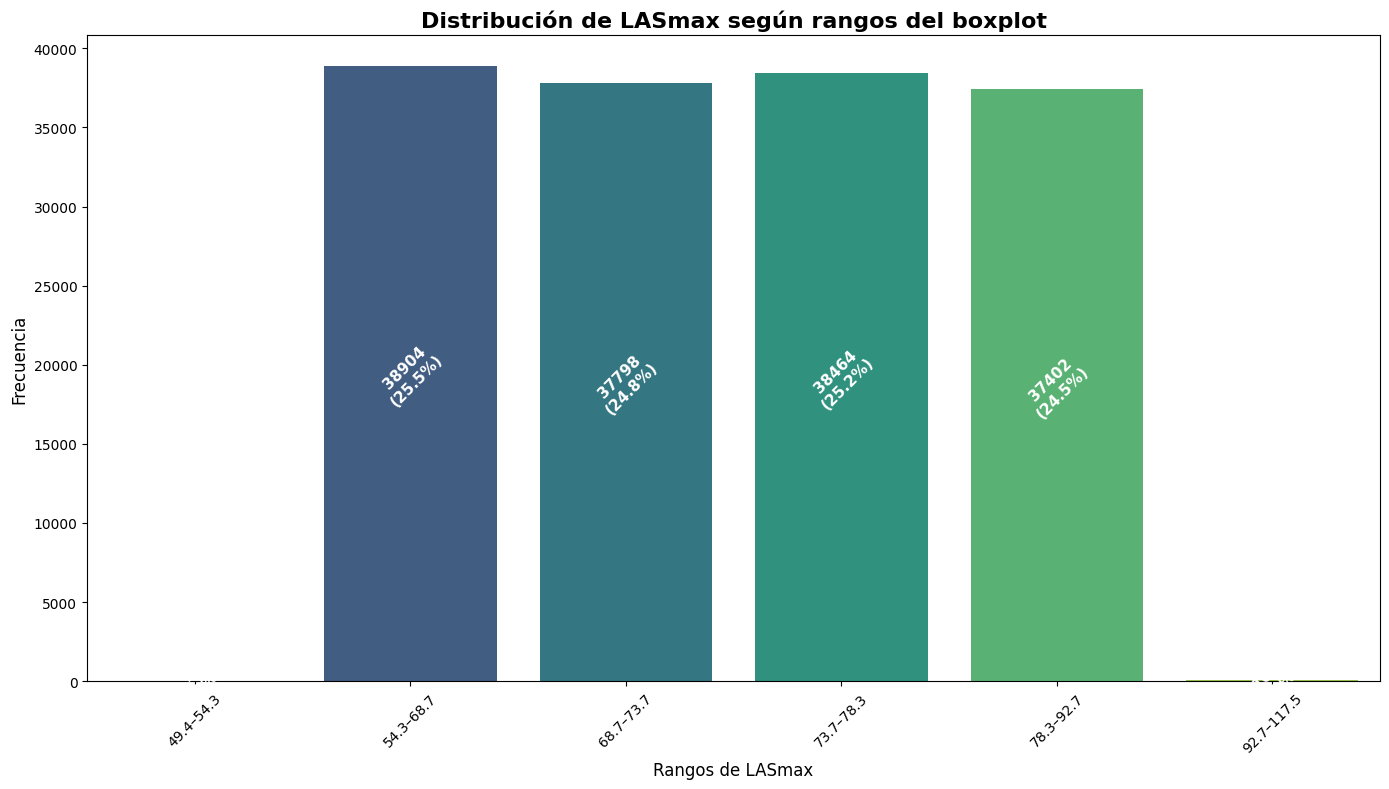

In [40]:
# Calcular valores estadísticos de LASmax
Q1 = df['LASmax'].quantile(0.25)
Q2 = df['LASmax'].quantile(0.50)
Q3 = df['LASmax'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
min_val = 49.40
max_val = 117.50

# Crear los bins y etiquetas en formato numérico
bins = [min_val - 0.1, lower_whisker, Q1, Q2, Q3, upper_whisker, max_val + 0.1]
labels = [
    f'{min_val:.1f}–{lower_whisker:.1f}',
    f'{lower_whisker:.1f}–{Q1:.1f}',
    f'{Q1:.1f}–{Q2:.1f}',
    f'{Q2:.1f}–{Q3:.1f}',
    f'{Q3:.1f}–{upper_whisker:.1f}',
    f'{upper_whisker:.1f}–{max_val:.1f}'
]

# Crear columna con los rangos
df['LASmax_BoxplotRange'] = pd.cut(df['LASmax'], bins=bins, labels=labels, include_lowest=True)

# Contar frecuencia y porcentaje
range_counts = df['LASmax_BoxplotRange'].value_counts().sort_index()
total = range_counts.sum()
percentages = (range_counts / total * 100).round(1)

# Gráfico de barras más grande
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=range_counts.index, y=range_counts.values, palette='viridis')

# Mostrar cantidad + porcentaje dentro de cada barra en diagonal
for i, (count, pct) in enumerate(zip(range_counts.values, percentages.values)):
    ax.text(
        i,                          # posición x
        count * 0.5,                # posición y: a mitad de la barra
        f'{count}\n({pct}%)',       # texto a mostrar
        ha='center',
        va='center',
        fontsize=11,
        rotation=45,
        color='white',
        fontweight='bold'
    )

# Estética
plt.title('Distribución de LASmax según rangos del boxplot', fontsize=16, fontweight='bold')
plt.xlabel('Rangos de LASmax', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

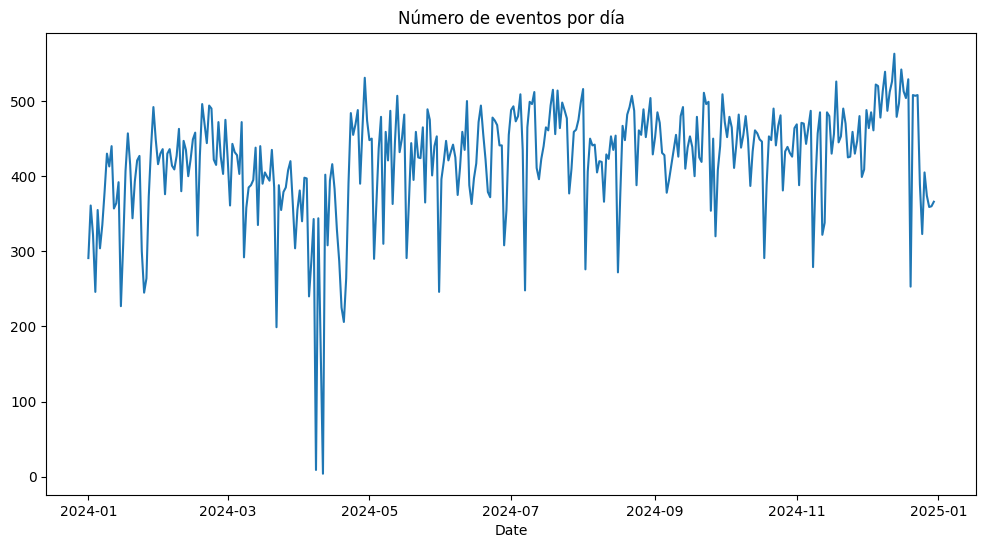

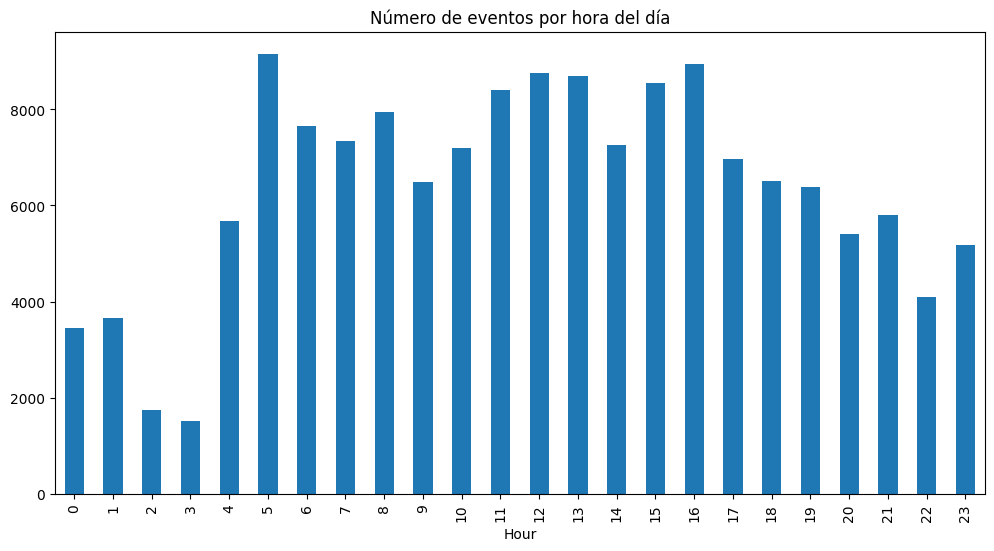

In [41]:
# Convertir Timestamp a tipo datetime
df['TLASmax'] = pd.to_datetime(df['TLASmax'], format='%d/%m/%Y %H:%M:%S')

# Crear columnas adicionales para análisis
df['Date'] = df['TLASmax'].dt.date
df['Hour'] = df['TLASmax'].dt.hour
df['DayOfWeek'] = df['TLASmax'].dt.day_name()

# Gráficos temporales
plt.figure(figsize=(12, 6))
df.groupby('Date').size().plot(kind='line', title='Número de eventos por día')
plt.show()

plt.figure(figsize=(12, 6))
df.groupby('Hour').size().plot(kind='bar', title='Número de eventos por hora del día')
plt.show()

C:\Users\claup\AppData\Local\Temp\ipykernel_5308\1151061587.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = df_noche.groupby(['Hour', 'LASmax_Rango']).size().unstack(fill_value=0)


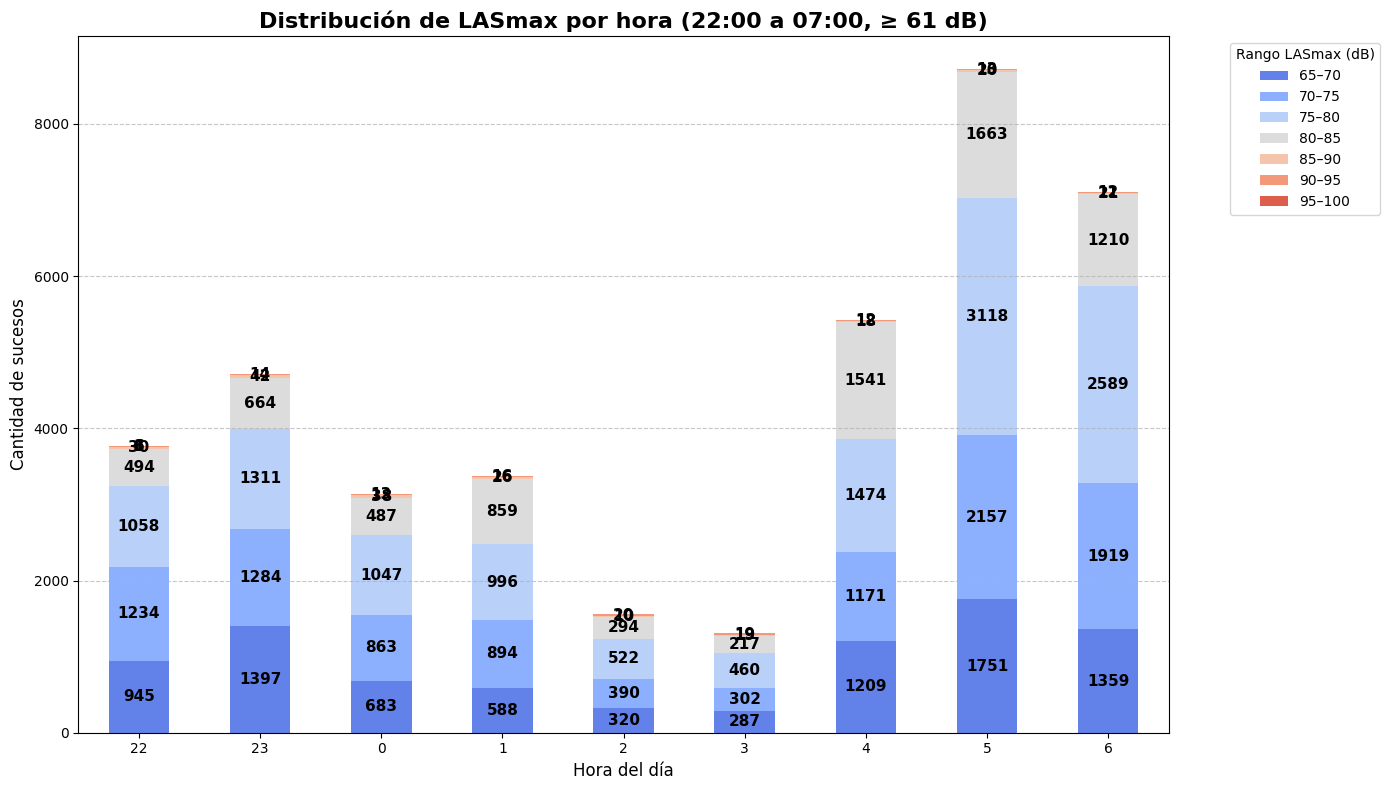

In [50]:
# Condición de hora: entre las 22:00 y las 07:01
condicion_hora = (df['Hour'] >= 22) | (df['Hour'] < 7.01)
df_noche = df[condicion_hora].copy()

# Crear rangos de LASmax cada 5 dB
bin_width = 5
min_db = int(df_noche['LASmax'].min()) // bin_width * bin_width
max_db = int(df_noche['LASmax'].max()) // bin_width * bin_width + bin_width
bins = list(range(min_db, max_db + bin_width, bin_width))
labels = [f'{i}–{i + bin_width}' for i in bins[:-1]]

# Asignar rangos
df_noche['LASmax_Rango'] = pd.cut(df_noche['LASmax'], bins=bins, labels=labels, include_lowest=True)

# Agrupar por hora y rango
conteo = df_noche.groupby(['Hour', 'LASmax_Rango']).size().unstack(fill_value=0)

# Eliminar rangos menores a 61 dB
columnas_filtradas = [col for col in conteo.columns if int(col.split('–')[0]) >= 61]
conteo = conteo[columnas_filtradas]

# Ordenar horas (de 22 a 23 y de 0 a 6)
horas_ordenadas = list(range(22, 24)) + list(range(0, 7))
conteo = conteo.reindex(horas_ordenadas)

# Paleta de colores intensos: azul (bajo) a rojo (alto)
color_palette = sns.color_palette("coolwarm", n_colors=len(columnas_filtradas)).as_hex()
color_dict = dict(zip(columnas_filtradas, color_palette))

# Gráfico
fig, ax = plt.subplots(figsize=(14, 8))
bar_container = conteo.plot(
    kind='bar',
    stacked=True,
    color=[color_dict[label] for label in conteo.columns],
    ax=ax
)

# Estética
ax.set_title('Distribución de LASmax por hora (22:00 a 07:00, ≥ 61 dB)', fontsize=16, fontweight='bold')
ax.set_xlabel('Hora del día', fontsize=12)
ax.set_ylabel('Cantidad de sucesos', fontsize=12)
ax.set_xticklabels(conteo.index, rotation=0)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title='Rango LASmax (dB)', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar conteo dentro de las barras
for bars in bar_container.containers:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{int(height)}',
                ha='center',
                va='center',
                fontsize=11,
                color='black',
                fontweight='bold'
            )

plt.tight_layout()
plt.show()

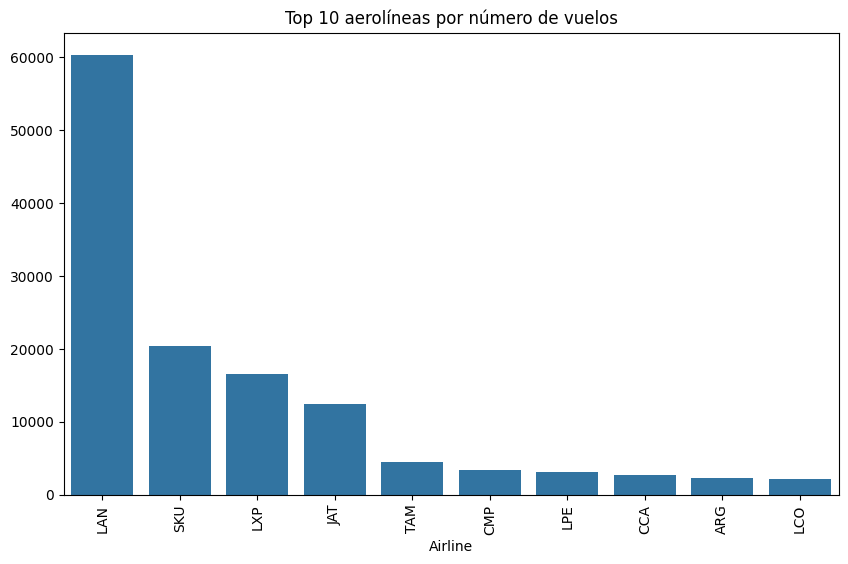

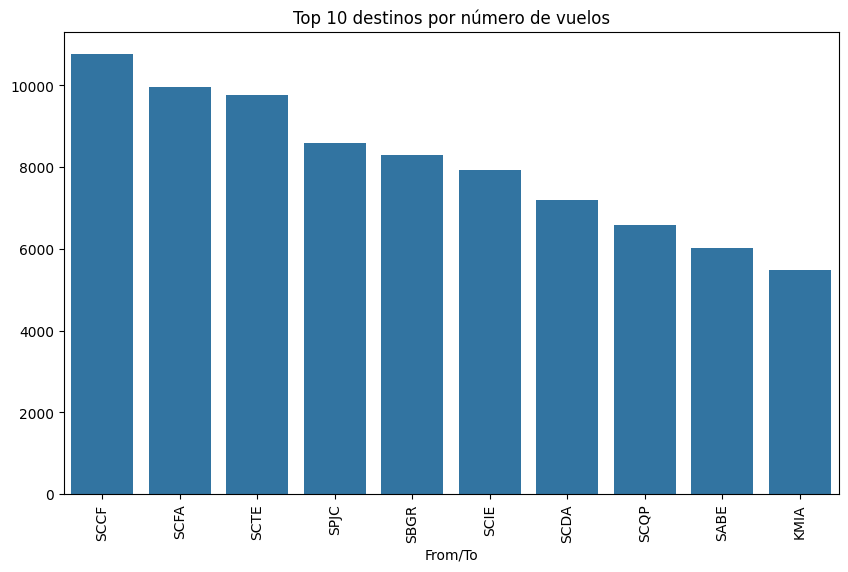

In [9]:
# Top aerolíneas por número de vuelos
top_airlines = df['Airline'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_airlines.index, y=top_airlines.values)
plt.xticks(rotation=90)
plt.title('Top 10 aerolíneas por número de vuelos')
plt.show()

# Top destinos por número de vuelos
top_destinations = df['From/To'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_destinations.index, y=top_destinations.values)
plt.xticks(rotation=90)
plt.title('Top 10 destinos por número de vuelos')
plt.show()

In [10]:
# Definir las condiciones de filtrado
condicion_LASmax = df['LASmax'] > 80 
condicion_SEL = df['SEL'] > 85 
condicion_hora = (df['Hour'] >= 22) | (df['Hour'] < 7)  # Entre las 10 PM (22:00) y las 7 AM

# Filtrar las filas que cumplan ambas condiciones
df_filtrado = df[condicion_LASmax & condicion_SEL & condicion_hora]

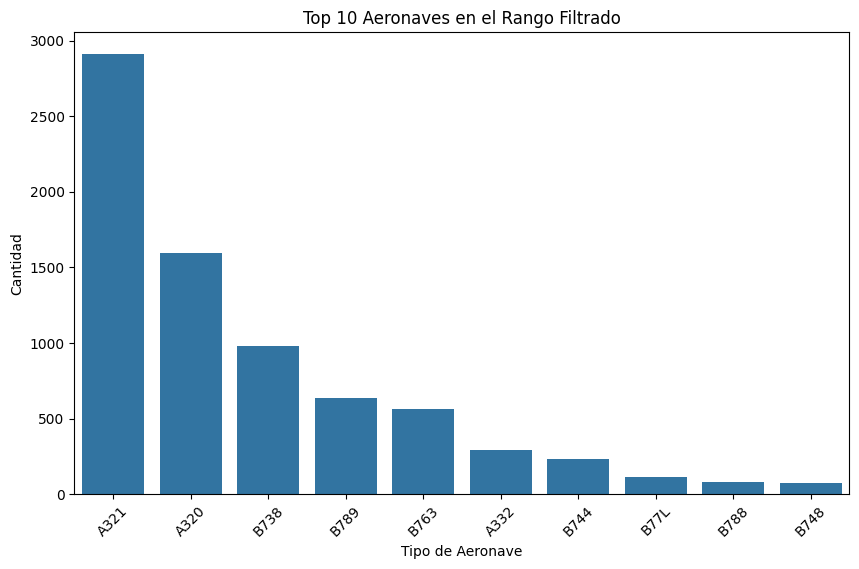

In [11]:
# Asegúrate de que 'Aircraft Type' sea la columna correcta en tu DataFrame
top_10_aeronaves = df_filtrado['Aircraft Type'].value_counts().head(10)

# Crear el gráfico de barras para el top 10 de aeronaves
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.barplot(x=top_10_aeronaves.index, y=top_10_aeronaves.values)

# Personalizar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas en el eje x si es necesario
plt.title('Top 10 Aeronaves en el Rango Filtrado')
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

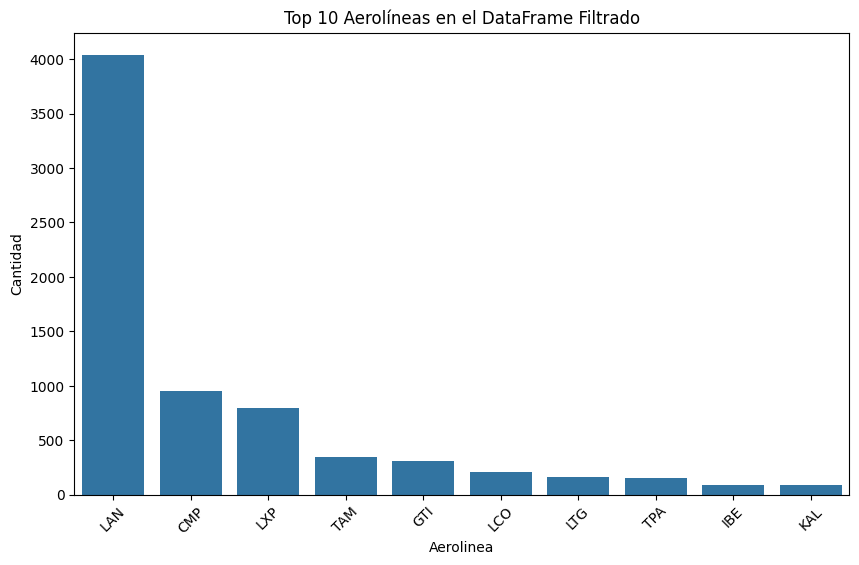

In [12]:
# Obtener las 10 aerolíneas más frecuentes
top_10_aerolineas = df_filtrado['Airline'].value_counts().head(10)

# Crear el gráfico de barras para las 10 aerolíneas más frecuentes
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.barplot(x=top_10_aerolineas.index, y=top_10_aerolineas.values)

# Personalizar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas en el eje x si es necesario
plt.title('Top 10 Aerolíneas en el DataFrame Filtrado')
plt.xlabel('Aerolinea')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

In [13]:
# 1. Top 3 aeronaves que emiten más ruido (máximo LASmax)
top_3_aeronaves = df_filtrado.groupby('Aircraft Type')['LASmax'].max().sort_values(ascending=False).head(3)

# 2. Top 3 From/To que generan más ruido (máximo LASmax)
top_3_from_to = df_filtrado.groupby('From/To')['LASmax'].max().sort_values(ascending=False).head(3)

# 3. Top 3 horas con mayor LASmax
top_3_horas = df_filtrado.groupby('Hour')['LASmax'].max().sort_values(ascending=False).head(3)
top_3_horas_formateadas = top_3_horas.index.astype(str) + ":00"

# Mostrar resultados

print("🔊 Top 3 Aeronaves que emiten más ruido:")
for aeronave, ruido in zip(top_3_aeronaves.index, top_3_aeronaves.values):
    print(f"- {aeronave}: {ruido:.2f} dB")

print("\n🌍 Top 3 From/To con mayor ruido:")
for ruta, ruido in zip(top_3_from_to.index, top_3_from_to.values):
    print(f"- {ruta}: {ruido:.2f} dB")

print("\n🕒 Top 3 Horas con mayor LASmax:")
for hora, ruido in zip(top_3_horas_formateadas, top_3_horas.values):
    print(f"- A las {hora}: {ruido:.2f} dB")

🔊 Top 3 Aeronaves que emiten más ruido:
- B744: 95.20 dB
- B722: 95.00 dB
- A21N: 94.70 dB

🌍 Top 3 From/To con mayor ruido:
- KMIA: 95.20 dB
- SUMU: 95.00 dB
- SCAR: 94.70 dB

🕒 Top 3 Horas con mayor LASmax:
- A las 22:00: 95.20 dB
- A las 23:00: 95.00 dB
- A las 2:00: 95.00 dB


In [14]:
# Aeronaves que tienen el lasmax máximo
aeronaves_top = ['B744', 'B722', 'A21N']

# Filtrar todas las filas donde Aircraft Type sea una de estas tres
df_top_aeronaves = df_filtrado[df_filtrado['Aircraft Type'].isin(aeronaves_top)]
df_top_aeronaves_completo = df[df['Aircraft Type'].isin(aeronaves_top)]


In [15]:
max_ruido_por_aeronave = df_filtrado.groupby('Aircraft Type')['LASmax'].max().sort_values(ascending=False)

# Mostrar
print(max_ruido_por_aeronave.head(10))

Aircraft Type
B744    95.2
B722    95.0
A21N    94.7
B763    92.4
A20N    90.9
B748    90.8
A321    90.4
C17     89.8
A332    89.5
B77L    89.1
Name: LASmax, dtype: float64


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Definir variables predictoras y objetivo
X = df[['Temperature [øC]', 'EPNL', 'Leq', 'SEL']]
y = df['LASmax']

# Separar train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))

MSE: 1.0032632990846013


In [ ]:
bkjbkjb